# Clustering techniques and Visualization


In [3]:
from sklearn import datasets
data = datasets.load_iris()

In [13]:
import pandas as pd
d_X = pd.DataFrame(data['data'],columns=data['feature_names'])
d_y = pd.DataFrame(data['target'])

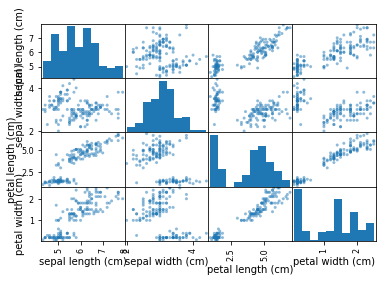

In [12]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
scatter_matrix(d_X)
plt.show()

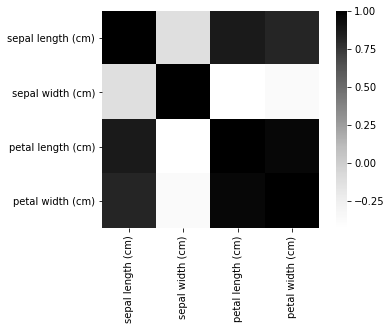

In [17]:
import seaborn as sns
corr_mat = d_X.corr()
sns.heatmap(corr_mat,vmax=1,square=True,cmap='Greys')
plt.show()

## The Elbow Method



In [18]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(d_X)
y = d_y

In [32]:
from sklearn.cluster import MiniBatchKMeans
def train_model(X,n_clusters=5):
    km = MiniBatchKMeans(n_clusters=n_clusters)
    km.fit(X)
    return km
inertia = []
n_clusters = []
for i in range(1,30):
    model = train_model(X,i)
    inertia.append(model.inertia_)
    n_clusters.append(i)

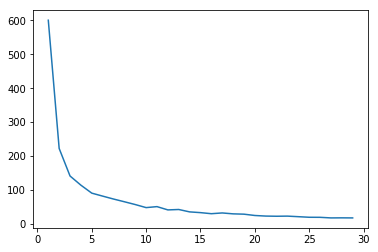

In [33]:
plt.plot(n_clusters,inertia)
plt.show()

## Visualization using PCA



In [72]:
import numpy as np
n_clusters = 3

km = MiniBatchKMeans(n_clusters=n_clusters)
km.fit(X)
labels = km.labels_


indexes = []
for i in range(0,n_clusters):
    index = np.where(labels==i)
    indexes.append(index)

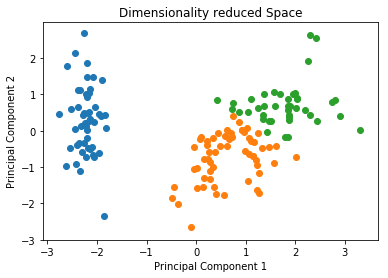

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)
p1,p2 = components[:,0],components[:,1]
for i in range(0,n_clusters):
    plt.scatter(p1[indexes[i]],p2[indexes[i]])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dimensionality reduced Space')
plt.show()

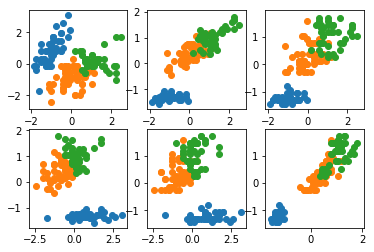

In [80]:
features = X.shape[1]

fig = plt.figure()
f_array = [i for i in range(0,4)]

ele = f_array.pop(0)

plot_x = []
plot_y = []

while len(f_array) != 0:
    for f in f_array:
        plot_x.append(ele)
        plot_y.append(f)
    ele = f_array.pop(0)


for i in range(0,len(plot_x)):
    fig.add_subplot(2,len(plot_x)/2,i+1)
    j,k = plot_x[i],plot_y[i]
    for v in range(0,n_clusters):
        feature1,feature2 = X[:,j],X[:,k]
        index = np.where(labels==v)
        
        plt.scatter(feature1[index],feature2[index])
plt.show()

## Clustering Evaluation

In [111]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# homogeneity_score(y,pd.DataFrame(km.labels_))

print('Homogeneity Score: {}'.format(homogeneity_score(y[0],pd.DataFrame(km.labels_)[0])))
print('Completeness_score: {}'.format(completeness_score(y[0],pd.DataFrame(km.labels_)[0])))
print('v_measure_score: {}'.format(v_measure_score(y[0],pd.DataFrame(km.labels_)[0])))

Homogeneity Score: 0.6622154948214524
Completeness_score: 0.6688264219532223
v_measure_score: 0.6655045410390213
